## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pharmaceuticals_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_pharmaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = (combined_pharmaceuticals_df["Mouse ID"].value_counts())
mice_count


g989    13
p136    10
z969    10
o926    10
a262    10
        ..
d133     1
x336     1
h428     1
v199     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_pharmaceuticals_df[combined_pharmaceuticals_df.duplicated()]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_pharmaceuticals_df.drop(combined_pharmaceuticals_df.loc[combined_pharmaceuticals_df['Mouse ID'] =="g989"].index)
clean_mice_df

clean_mice_count = (clean_mice_df["Mouse ID"].value_counts())
clean_mice_count

a818    10
y163    10
g570    10
z969    10
o926    10
        ..
d133     1
l872     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_df["Mouse ID"].value_counts())
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groupby_df = clean_mice_df.groupby(["Drug Regimen"])
mean_tumor_volume = regimen_groupby_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_groupby_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = regimen_groupby_df["Tumor Volume (mm3)"].var()
tumor_volume_std = regimen_groupby_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = regimen_groupby_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Standard Deviation": tumor_volume_std, "Tumor Volume SEM": tumor_volume_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

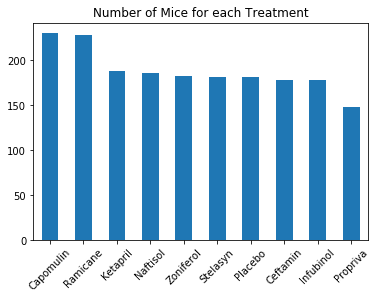

In [20]:
#create a count of mice that takes each drug
mice_drug_count = clean_mice_df["Drug Regimen"].value_counts()
mice_drug_count
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treated_mice_df = mice_drug_count.plot(x="Treatment", y="Number of Mice",kind='bar', title='Number of Mice for each Treatment', rot=45)
treated_mice_df

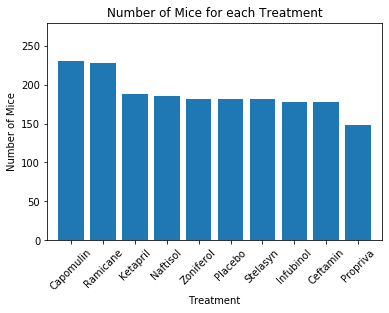

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_drug_count))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25) 
plt.ylim(0, max(mice_drug_count+50))
plt.bar(x_axis, mice_drug_count, align ="center")

plt.title("Number of Mice for each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")

plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count = len(clean_mice_df.loc[clean_mice_df["Sex"] == "Male"])
female_count = len(clean_mice_df.loc[clean_mice_df["Sex"] == "Female"])

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["red", "blue"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
